In [1]:
import numpy as np
import gym

from RL.utils import train, test, plot
from RL.environments.highlow import HighLow

env_cartpole = gym.make('CartPole-v0').unwrapped
env_pendulum = gym.make('Pendulum-v0').unwrapped
# mountaincarcontinuous_env = gym.make('MountainCarContinuous-v0').unwrapped
# highlow_env = HighLow()

In [ ]:
# universal params
gamma = .99
hidden_dim = 128
lr = 1e-3
device = 'cuda'
dtype = 'float32'

# agents that sample from memory
memory_maxlen = int(1e5) # float causes error

# training params
save_freq = 10

# CartPole

In [ ]:
save_dir = './experiments/cartpole/'
max_steps = int(1e5)
max_episode_steps = int(1e3)

### Random

In [ ]:
%%time
params = {'file_name':'random', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0}
train('random', env_cartpole, verbose=False, save_freq=save_freq, save_dir=save_dir, **params)

### A2C

In [ ]:
%%time
params = {'file_name':'a2c - mc, separate net', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'relu', 'beta':0.1, 'clip':False, 'shared_network':False, 'target_update_freq':None}
train('a2c', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - mc, shared net', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'relu', 'beta':0.1, 'clip':False, 'shared_network':True, 'target_update_freq':None}
train('a2c', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - td, separate net', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'relu', 'beta':0.1, 'clip':False, 'shared_network':False, 'target_update_freq':100}
train('a2c', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - td, shared net', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'relu', 'beta':0.1, 'clip':False, 'shared_network':True, 'target_update_freq':100}
train('a2c', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

### DQN Offline

In [ ]:
%%time
params = {'file_name':'dqn - offline', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'online':False, 'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':32, 'clip':False, 'dueling':False, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':memory_maxlen, 'per':False, 'memory_alpha':None, 'memory_beta':None, 'target_update_freq':None}
train('dqn', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'dqn - offline, double', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'online':False, 'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':32, 'clip':False, 'dueling':False, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':memory_maxlen, 'per':False, 'memory_alpha':None, 'memory_beta':None, 'target_update_freq':100}
train('dqn', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'dqn - offline, double, dueling', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'online':False, 'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':32, 'clip':False, 'dueling':True, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':memory_maxlen, 'per':False, 'memory_alpha':None, 'memory_beta':None, 'target_update_freq':100}
train('dqn', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

### DQN Online

In [ ]:
%%time
params = {'file_name':'dqn - online, double', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'online':True, 'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':32, 'clip':False, 'dueling':False, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':memory_maxlen, 'per':False, 'memory_alpha':None, 'memory_beta':None, 'target_update_freq':100}
train('dqn', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'dqn - online, double, dueling, per', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'online':True, 'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':32, 'clip':False, 'dueling':True, 'epsilon':1.0, 'epsilon_min':.05, 'epsilon_decay':.99, 'memory_maxlen':memory_maxlen, 'per':True, 'memory_alpha':.5, 'memory_beta':.4, 'target_update_freq':100}
train('dqn', env_cartpole, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

### Plots

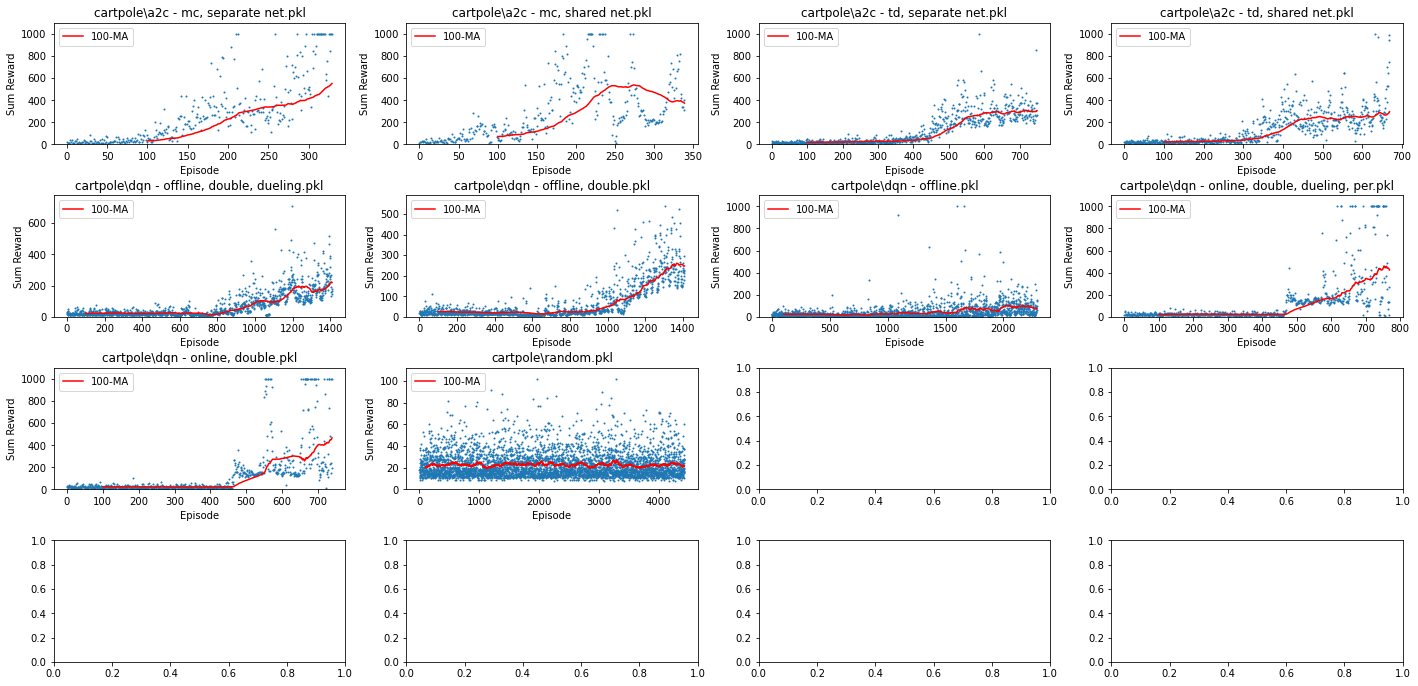

In [2]:
plot('./experiments/cartpole/', ep_avg=False, ma_len=100, verbose=False)

### Test

In [ ]:
test('./experiments/cartpole/dqn - online, double, dueling, per.pkl', './experiments/cartpole/dqn - online, double, dueling, per.pth', env_cartpole, 1, display=True, video_dir='./experiments/cartpole/monitor')

# Pendulum

In [ ]:
save_dir = './experiments/pendulum/'
max_steps = int(1e5)
max_episode_steps = 200

### Random

In [ ]:
params = {'file_name':'random', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0}
train('random', env_pendulum, verbose=False, save_freq=save_freq, save_dir=save_dir, **params)

### TD3

In [ ]:
%%time
params = {'file_name':'td3', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':1e4,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'batch_size':100, 'expl_noise':.1, 'memory_maxlen':memory_maxlen, 'noise_clip':.5, 'policy_freq':2, 'policy_noise':.2, 'tau':.005}
train('td3', env_pendulum, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

### A2C

In [ ]:
%%time
params = {'file_name':'a2c - mc, separate network', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'tanh', 'beta':.78, 'clip':False, 'shared_network':False, 'target_update_freq':None}
train('a2c', env_pendulum, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - mc, shared network', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'tanh', 'beta':.78, 'clip':False, 'shared_network':True, 'target_update_freq':None}
train('a2c', env_pendulum, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - td, separate network', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'tanh', 'beta':.78, 'clip':False, 'shared_network':False, 'target_update_freq':100}
train('a2c', env_pendulum, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

In [ ]:
%%time
params = {'file_name':'a2c - td, shared network', 'max_steps':max_steps, 'max_episode_steps':max_episode_steps, 'start_at':0,
          'gamma':gamma, 'hidden_dim':hidden_dim, 'learning_rate':lr, 'device':device, 'dtype':dtype,
          'activation':'tanh', 'beta':.78, 'clip':False, 'shared_network':True, 'target_update_freq':100}
train('a2c', env_pendulum, verbose=True, save_freq=save_freq, save_dir=save_dir, **params)

### Plots

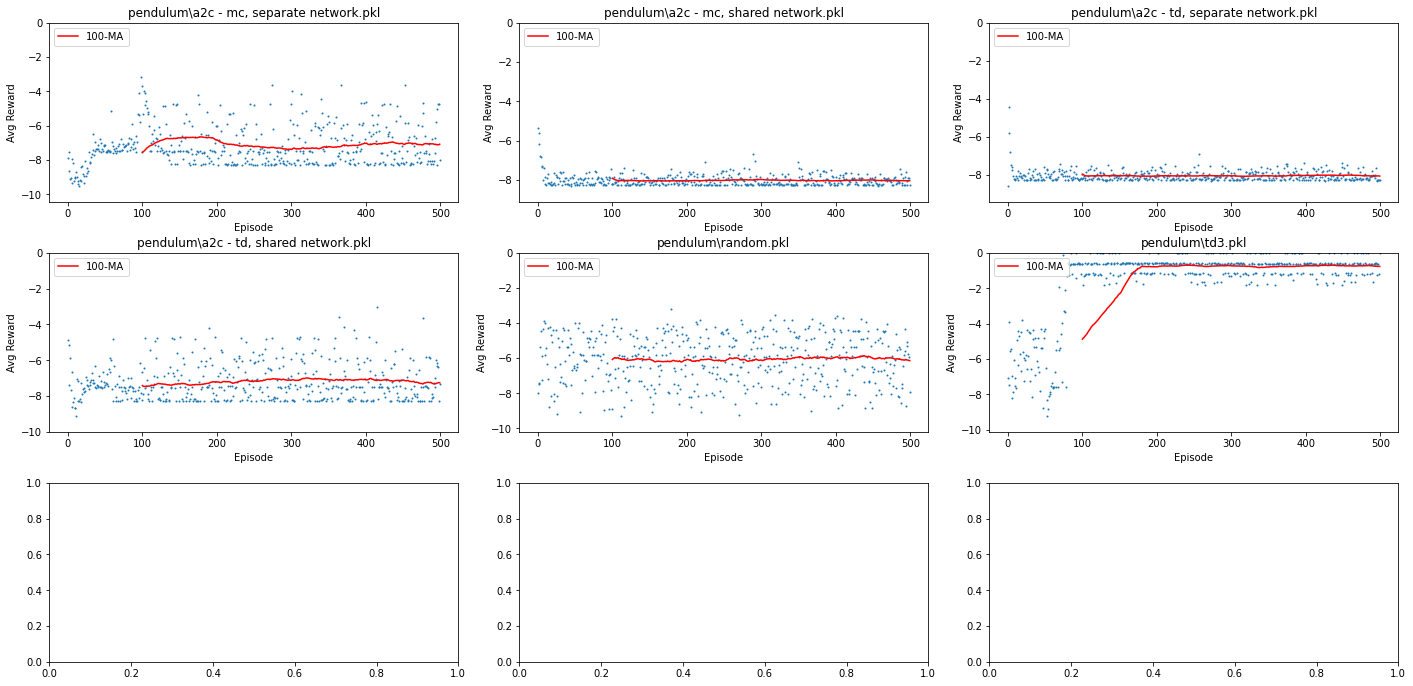

In [3]:
plot('./experiments/pendulum/', ep_avg=True, ma_len=100, verbose=False)

### Test

In [ ]:
test('./experiments/pendulum/td3.pkl', './experiments/pendulum/td3.pth', env_pendulum, 1, display=True, video_dir='./experiments/pendulum/monitor')